# Exploratory Data Analysis (EDA) — Player Churn Prediction

This notebook performs a detailed EDA on the online gaming behavior dataset to understand patterns that drive player churn.

**Tasks:**
1. Target variable distribution (churned vs active)
2. Session frequency distribution
3. Session duration distribution
4. Player level distribution
5. Compare churned vs active players (avg sessions/week, avg session duration, avg player level)
6. Correlation heatmap
7. Top 5 features correlated with churn
8. Save all plots to `notebooks/plots/`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Plotting settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

# Create plots directory if it doesn't exist
PLOTS_DIR = "plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Load dataset
df = pd.read_csv("../data/online_gaming_behavior_dataset.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (40034, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
# Basic dataset info
print("=" * 60)
print("DATASET INFO")
print("=" * 60)
print(df.info())
print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
print(df.isnull().sum())
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
df.describe()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [3]:
# Create binary churn column
# EngagementLevel "Low" is treated as churned, "Medium" and "High" as active
df["Churned"] = (df["EngagementLevel"] == "Low").astype(int)
print("Churn mapping: Low → Churned (1), Medium/High → Active (0)")
print(f"\nChurn distribution:\n{df['Churned'].value_counts()}")
print(f"\nChurn rate: {df['Churned'].mean():.2%}")

Churn mapping: Low → Churned (1), Medium/High → Active (0)

Churn distribution:
Churned
0    29710
1    10324
Name: count, dtype: int64

Churn rate: 25.79%


## 1. Target Variable Distribution (Churned vs Active)

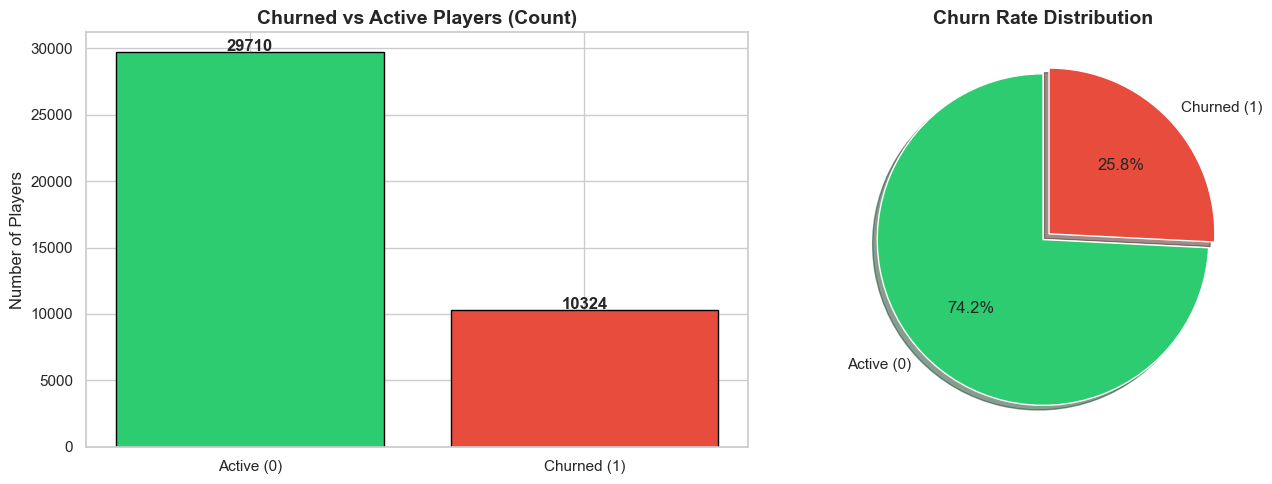

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
churn_counts = df["Churned"].value_counts()
labels = ["Active (0)", "Churned (1)"]
colors = ["#2ecc71", "#e74c3c"]

axes[0].bar(labels, churn_counts.values, color=colors, edgecolor="black")
axes[0].set_title("Churned vs Active Players (Count)", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Number of Players")
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha="center", fontweight="bold")

# Pie chart
axes[1].pie(churn_counts.values, labels=labels, autopct="%1.1f%%", colors=colors,
            startangle=90, explode=(0, 0.05), shadow=True)
axes[1].set_title("Churn Rate Distribution", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/01_target_distribution.png", bbox_inches="tight")
plt.show()

## 2. Session Frequency Distribution

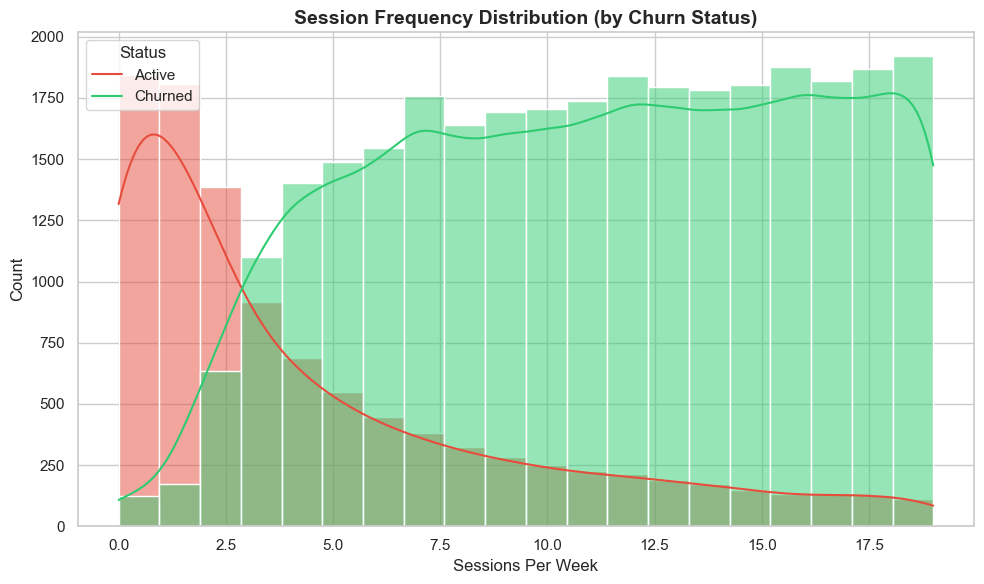

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="SessionsPerWeek", hue="Churned", kde=True,
             palette={0: "#2ecc71", 1: "#e74c3c"}, bins=20, ax=ax)
ax.set_title("Session Frequency Distribution (by Churn Status)", fontsize=14, fontweight="bold")
ax.set_xlabel("Sessions Per Week")
ax.set_ylabel("Count")
ax.legend(title="Status", labels=["Active", "Churned"])
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/02_session_frequency_distribution.png", bbox_inches="tight")
plt.show()

## 3. Session Duration Distribution

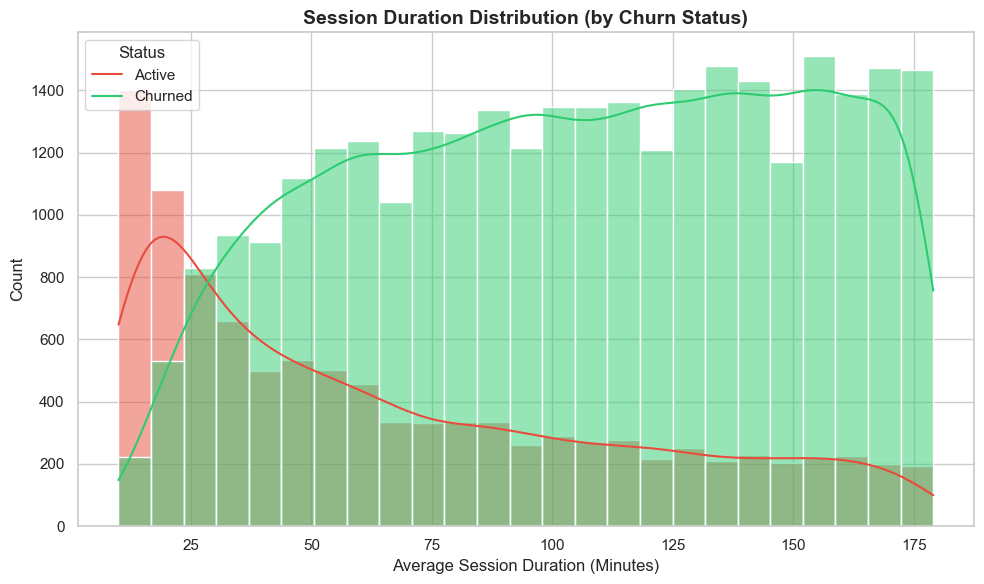

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="AvgSessionDurationMinutes", hue="Churned", kde=True,
             palette={0: "#2ecc71", 1: "#e74c3c"}, bins=25, ax=ax)
ax.set_title("Session Duration Distribution (by Churn Status)", fontsize=14, fontweight="bold")
ax.set_xlabel("Average Session Duration (Minutes)")
ax.set_ylabel("Count")
ax.legend(title="Status", labels=["Active", "Churned"])
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/03_session_duration_distribution.png", bbox_inches="tight")
plt.show()

## 4. Player Level Distribution

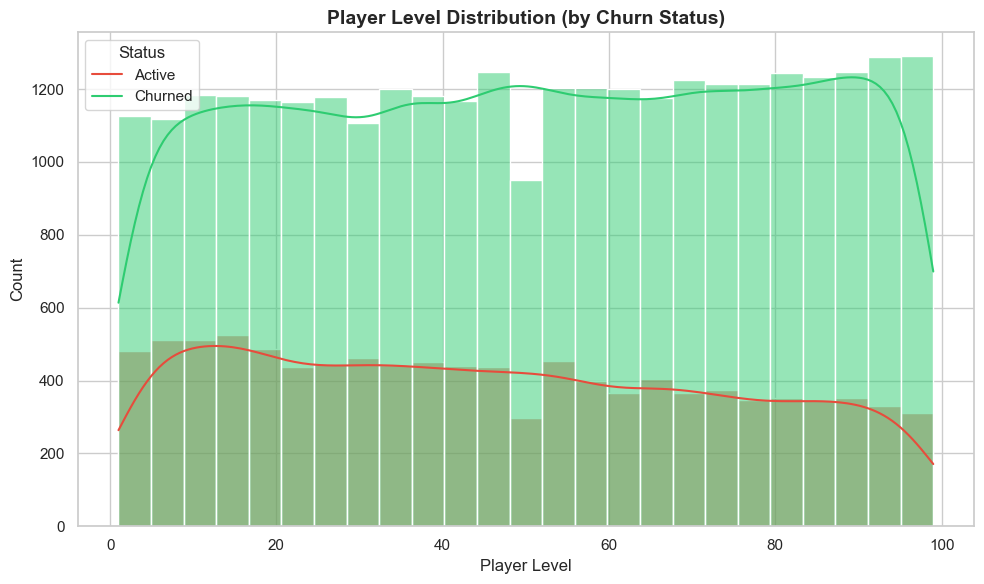

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="PlayerLevel", hue="Churned", kde=True,
             palette={0: "#2ecc71", 1: "#e74c3c"}, bins=25, ax=ax)
ax.set_title("Player Level Distribution (by Churn Status)", fontsize=14, fontweight="bold")
ax.set_xlabel("Player Level")
ax.set_ylabel("Count")
ax.legend(title="Status", labels=["Active", "Churned"])
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/04_player_level_distribution.png", bbox_inches="tight")
plt.show()

## 5. Compare Churned vs Active Players

Comparing average metrics between churned and active players:
- Average Sessions Per Week
- Average Session Duration
- Average Player Level

In [8]:
# Calculate comparison metrics
comparison = df.groupby("Churned").agg(
    AvgSessionsPerWeek=("SessionsPerWeek", "mean"),
    AvgSessionDuration=("AvgSessionDurationMinutes", "mean"),
    AvgPlayerLevel=("PlayerLevel", "mean"),
    AvgPlayTimeHours=("PlayTimeHours", "mean"),
    AvgAchievements=("AchievementsUnlocked", "mean"),
).round(2)
comparison.index = ["Active", "Churned"]
print("Comparison of Churned vs Active Players:")
comparison

Comparison of Churned vs Active Players:


,AvgSessionsPerWeek,AvgSessionDuration,AvgPlayerLevel,AvgPlayTimeHours,AvgAchievements
Active,11.19,104.49,50.89,12.0,25.17
Churned,4.53,66.88,46.10,12.1,22.66


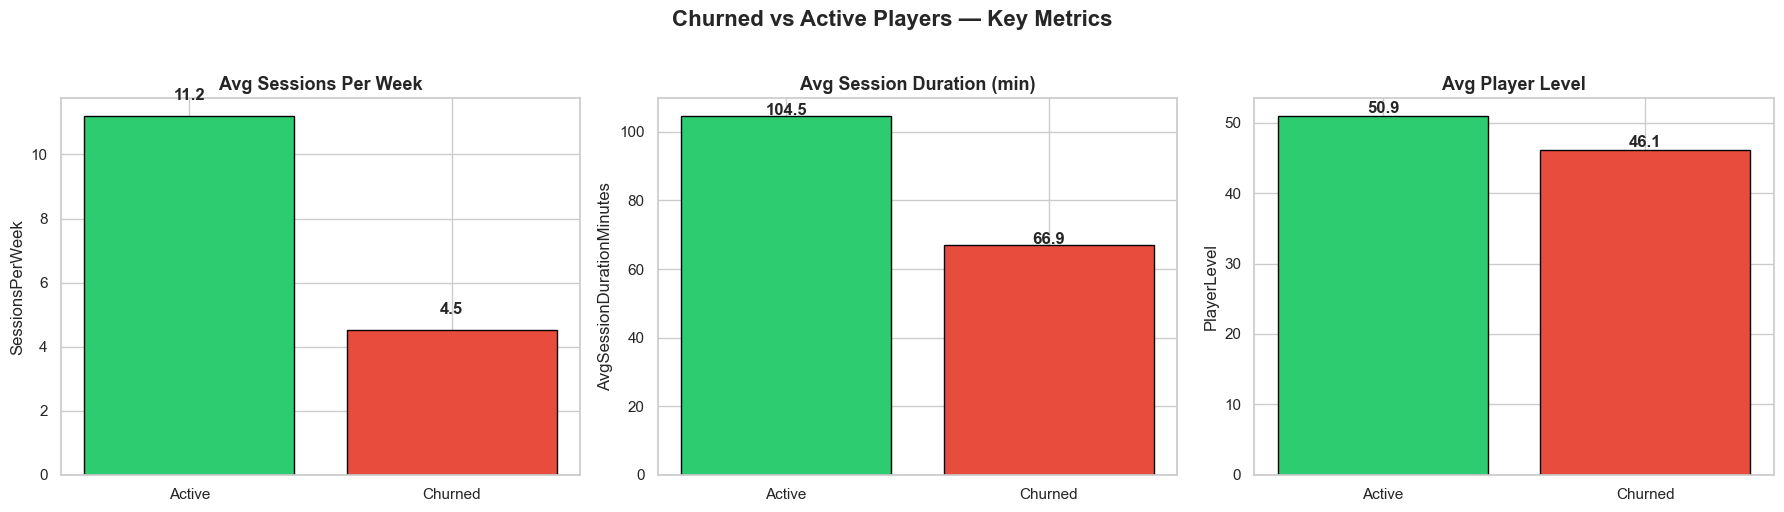

In [9]:
# Grouped bar charts comparing churned vs active
metrics = ["SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel"]
titles = ["Avg Sessions Per Week", "Avg Session Duration (min)", "Avg Player Level"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ["#2ecc71", "#e74c3c"]

for ax, metric, title in zip(axes, metrics, titles):
    grouped = df.groupby("Churned")[metric].mean()
    bars = ax.bar(["Active", "Churned"], grouped.values, color=colors, edgecolor="black")
    ax.set_title(title, fontsize=13, fontweight="bold")
    ax.set_ylabel(metric)
    for bar, val in zip(bars, grouped.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                f"{val:.1f}", ha="center", fontweight="bold")

plt.suptitle("Churned vs Active Players — Key Metrics", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/05_churned_vs_active_comparison.png", bbox_inches="tight")
plt.show()

## 6. Additional Distribution Plots

Exploring distributions of other features by churn status.

/var/folders/_q/3fk02ywd7zj53hh6gw8yk1b40000gn/T/ipykernel_451/616352764.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Active", "Churned"])
/var/folders/_q/3fk02ywd7zj53hh6gw8yk1b40000gn/T/ipykernel_451/616352764.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Active", "Churned"])
/var/folders/_q/3fk02ywd7zj53hh6gw8yk1b40000gn/T/ipykernel_451/616352764.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Active", "Churned"])
/var/folders/_q/3fk02ywd7zj53hh6gw8yk1b40000gn/T/ipykernel_451/616352764.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtickla

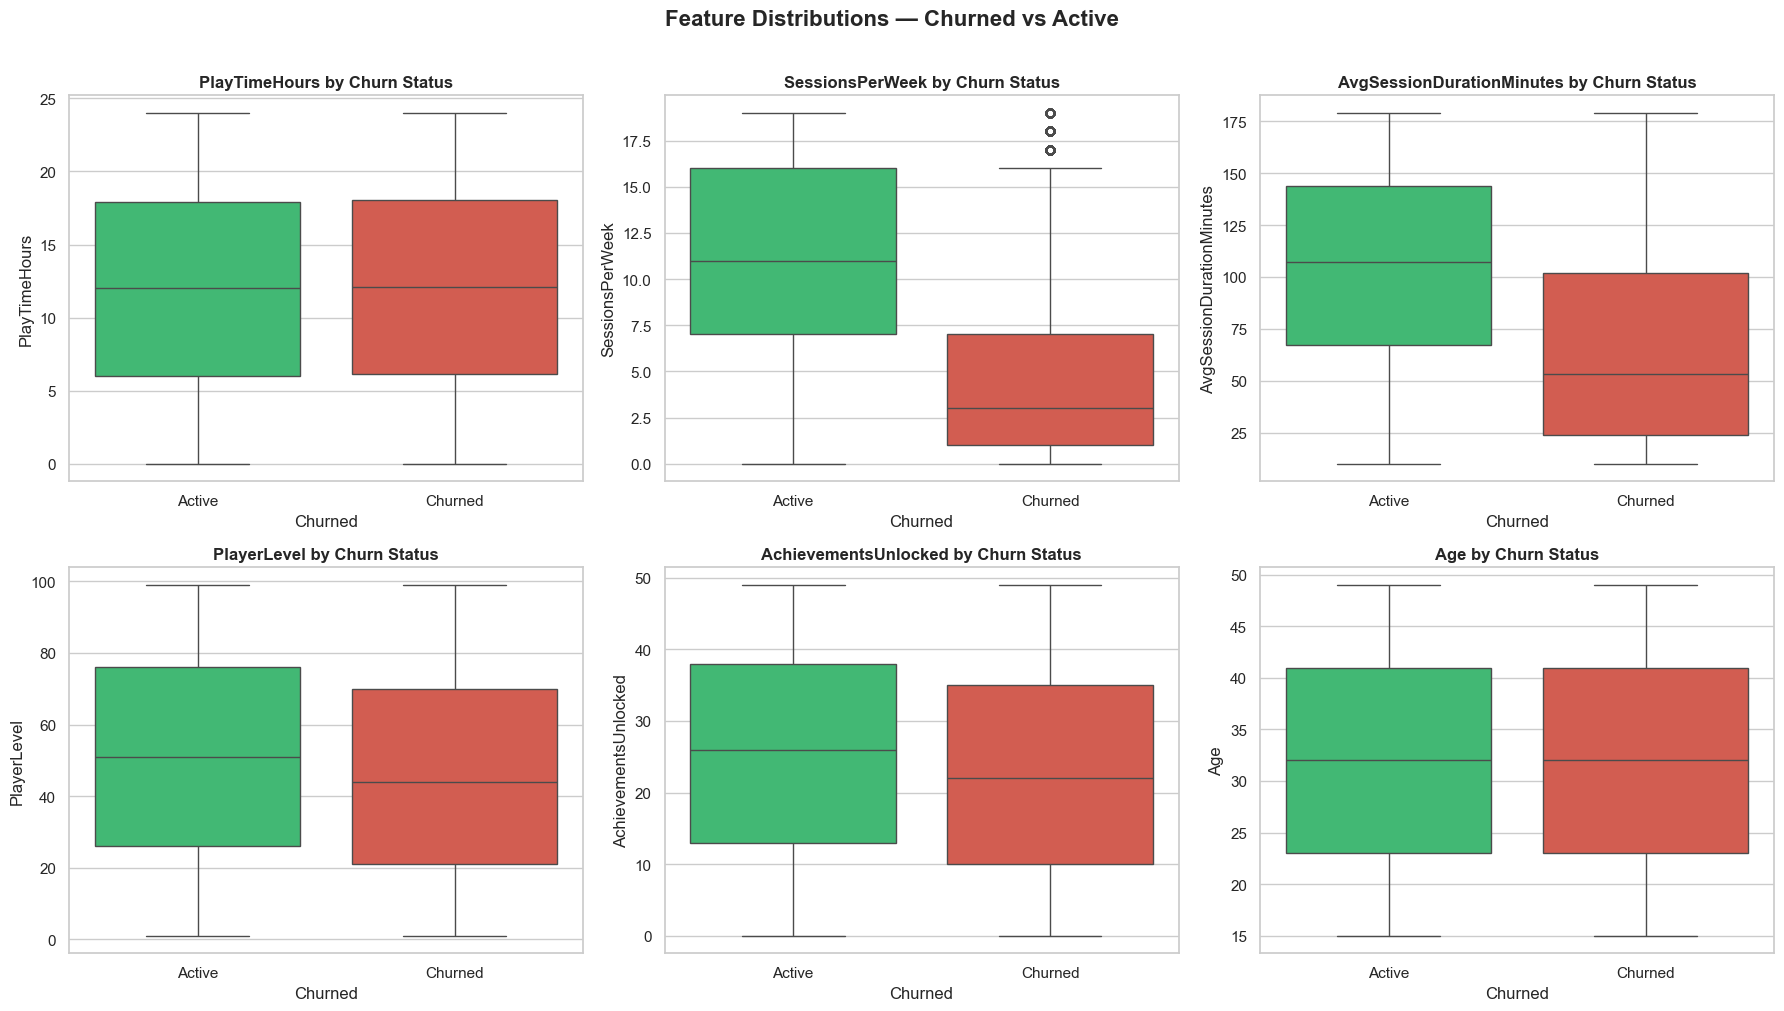

In [10]:
# Box plots for numerical features by churn status
numerical_features = ["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes",
                      "PlayerLevel", "AchievementsUnlocked", "Age"]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x="Churned", y=feature, hue="Churned", ax=axes[i],
                palette={0: "#2ecc71", 1: "#e74c3c"}, legend=False)
    axes[i].set_xticklabels(["Active", "Churned"])
    axes[i].set_title(f"{feature} by Churn Status", fontsize=12, fontweight="bold")

plt.suptitle("Feature Distributions — Churned vs Active", fontsize=16, fontweight="bold", y=1.01)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/06_boxplots_by_churn.png", bbox_inches="tight")
plt.show()

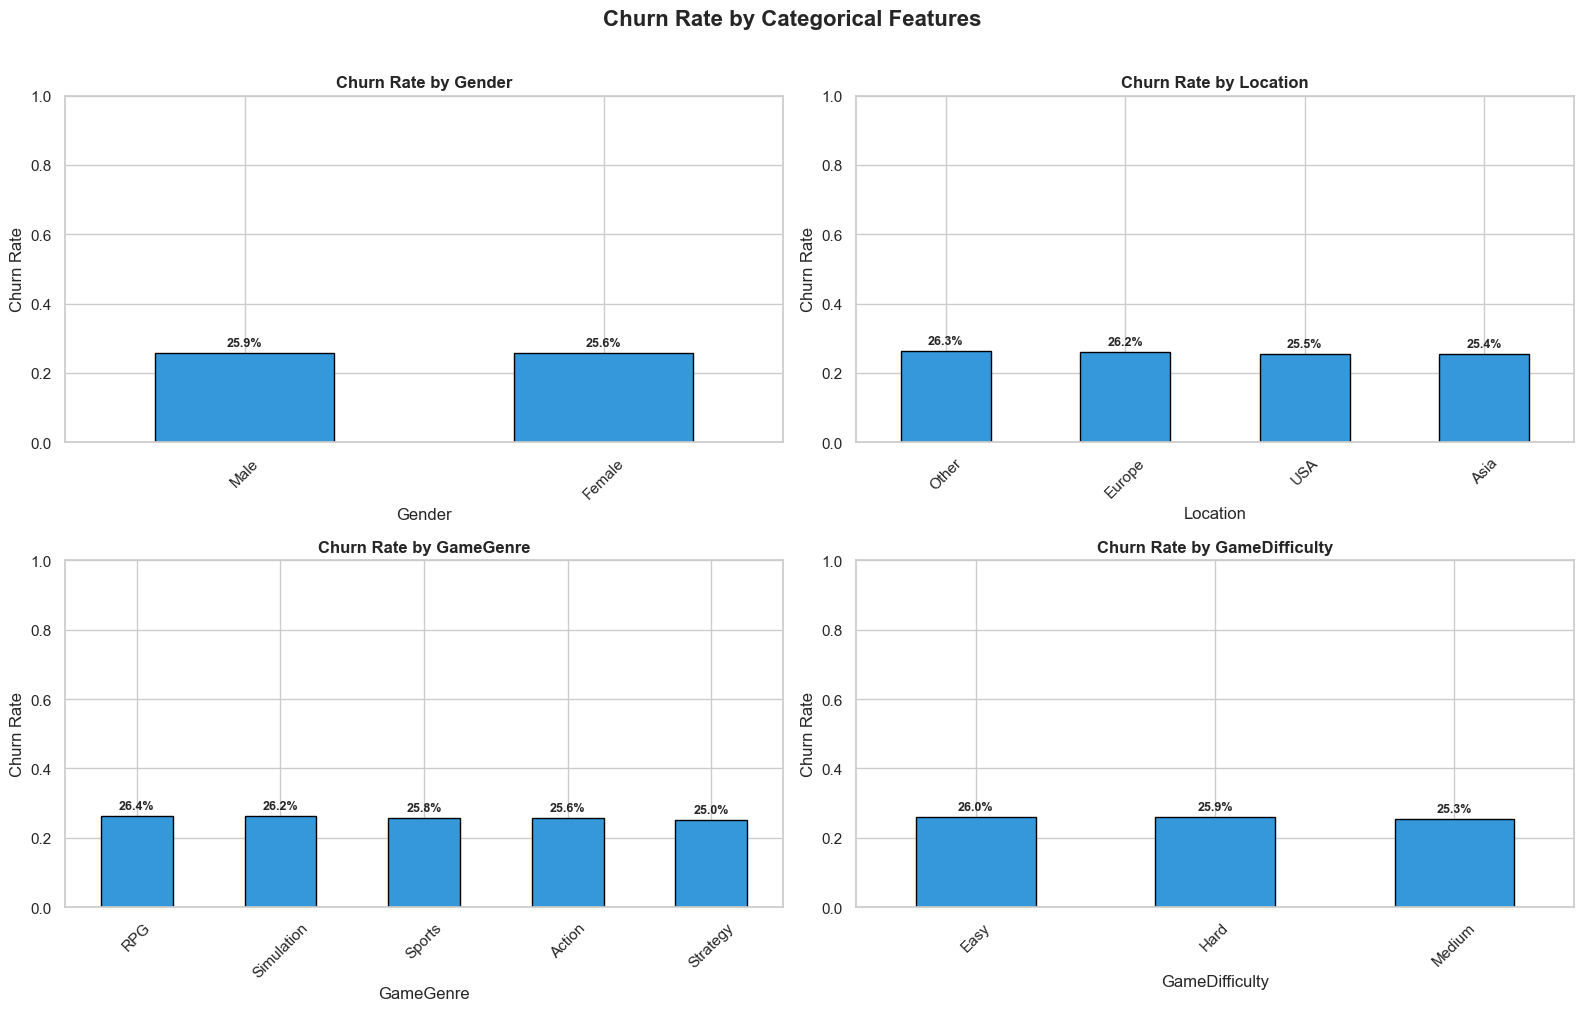

In [11]:
# Churn rate by categorical features
categorical_features = ["Gender", "Location", "GameGenre", "GameDifficulty"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    churn_rate = df.groupby(feature)["Churned"].mean().sort_values(ascending=False)
    churn_rate.plot(kind="bar", ax=axes[i], color="#3498db", edgecolor="black")
    axes[i].set_title(f"Churn Rate by {feature}", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Churn Rate")
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis="x", rotation=45)
    # Add percentage labels
    for j, v in enumerate(churn_rate.values):
        axes[i].text(j, v + 0.02, f"{v:.1%}", ha="center", fontweight="bold", fontsize=9)

plt.suptitle("Churn Rate by Categorical Features", fontsize=16, fontweight="bold", y=1.01)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/07_churn_rate_by_category.png", bbox_inches="tight")
plt.show()

## 7. Correlation Heatmap

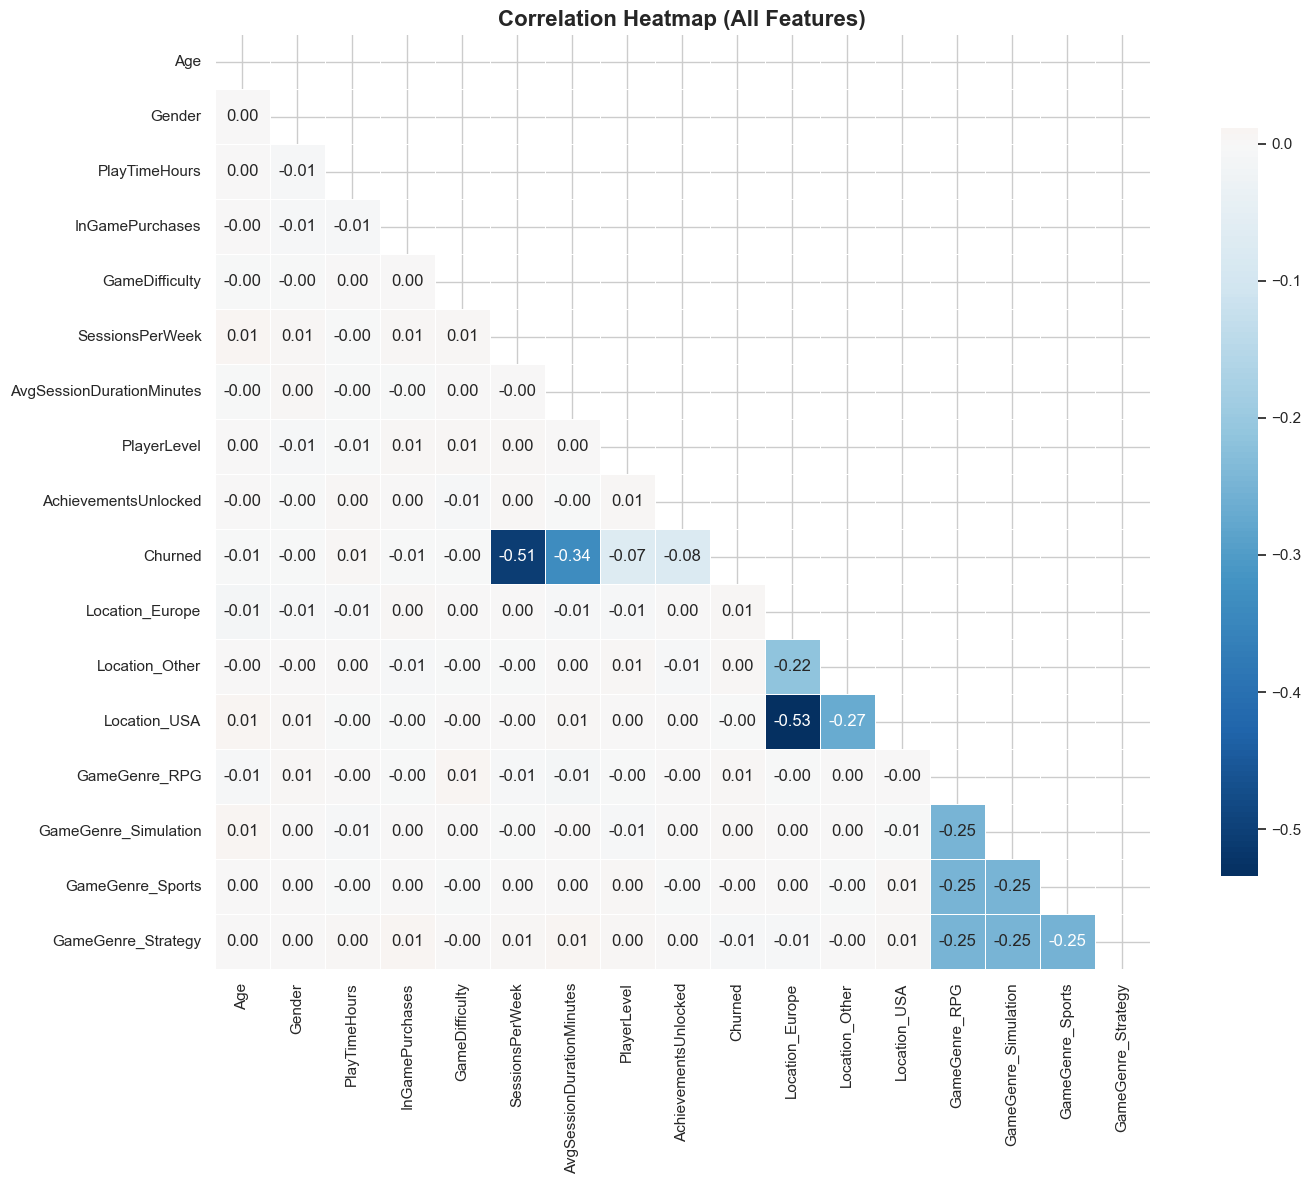

In [12]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].map({"Male": 0, "Female": 1, "Other": 2})
df_encoded["GameDifficulty"] = df_encoded["GameDifficulty"].map({"Easy": 0, "Medium": 1, "Hard": 2})

# One-hot encode remaining categoricals
df_encoded = pd.get_dummies(df_encoded, columns=["Location", "GameGenre"], drop_first=True)
df_encoded.drop(columns=["PlayerID", "EngagementLevel"], inplace=True)

# Correlation matrix
corr_matrix = df_encoded.corr()

fig, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={"shrink": 0.8})
ax.set_title("Correlation Heatmap (All Features)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/08_correlation_heatmap.png", bbox_inches="tight")
plt.show()

## 8. Top 5 Features Correlated with Churn

Top 5 Features Most Correlated with Churn:
  1. SessionsPerWeek                     -0.5054
  2. AvgSessionDurationMinutes           -0.3357
  3. AchievementsUnlocked                -0.0762
  4. PlayerLevel                         -0.0733
  5. GameGenre_Strategy                  -0.0086


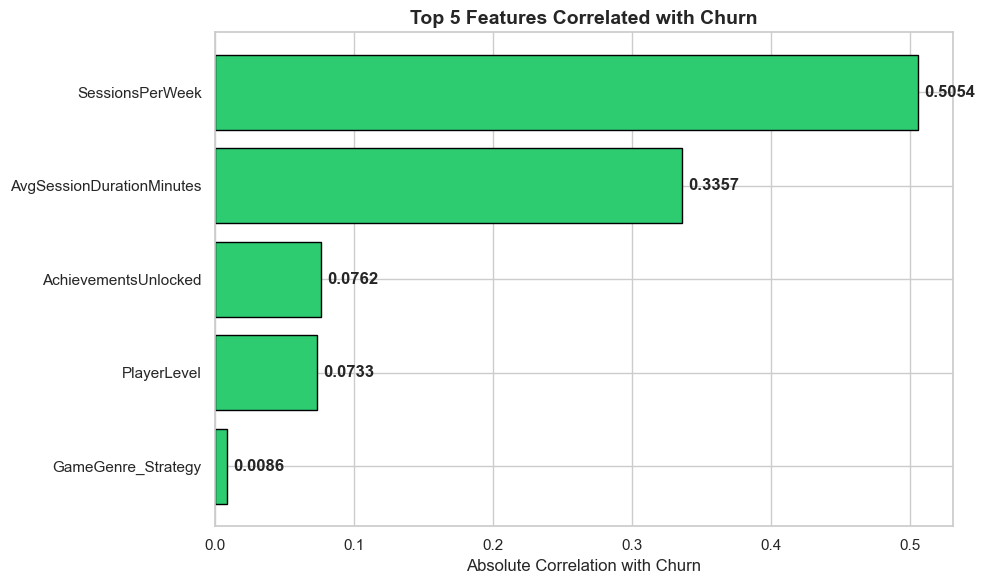

In [13]:
# Top 5 features most correlated with Churn (by absolute value)
churn_corr = corr_matrix["Churned"].drop("Churned").abs().sort_values(ascending=False)
top5 = churn_corr.head(5)

print("Top 5 Features Most Correlated with Churn:")
print("=" * 45)
for rank, (feature, corr_val) in enumerate(top5.items(), 1):
    direction = "+" if corr_matrix.loc[feature, "Churned"] > 0 else "-"
    print(f"  {rank}. {feature:<35} {direction}{corr_val:.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#e74c3c" if corr_matrix.loc[f, "Churned"] > 0 else "#2ecc71" for f in top5.index]
bars = ax.barh(top5.index[::-1], top5.values[::-1], color=colors[::-1], edgecolor="black")
ax.set_xlabel("Absolute Correlation with Churn")
ax.set_title("Top 5 Features Correlated with Churn", fontsize=14, fontweight="bold")

# Add value labels
for bar, val in zip(bars, top5.values[::-1]):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
            f"{val:.4f}", va="center", fontweight="bold")

plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/09_top5_correlated_features.png", bbox_inches="tight")
plt.show()

## 9. Key Insights & Summary

### Insights from the EDA:

1. **Churn Definition**: Players with `EngagementLevel = "Low"` are classified as churned. This binary label allows us to build a classification model.

2. **Target Distribution**: The dataset shows the split between churned and active players — understanding class balance is critical for model selection and evaluation metrics.

3. **Session Frequency**: The distribution of sessions per week reveals how frequently players engage. Churned players may show distinct patterns in session frequency.

4. **Session Duration**: Average session duration helps identify whether shorter or longer play sessions correlate with churn.

5. **Player Level**: Player progression (level) can indicate how invested a player is — lower levels among churned players suggest early drop-off.

6. **Churned vs Active Comparison**: The grouped comparison highlights which behavioral metrics differ most between churned and active players, guiding feature importance for modeling.

7. **Categorical Analysis**: Churn rates broken down by gender, location, game genre, and difficulty reveal if certain segments are more at risk.

8. **Correlation Analysis**: The heatmap and top-5 ranking identify the strongest linear relationships with churn, informing feature selection for the prediction model.

### Next Steps:
- Feature engineering based on EDA insights
- Build and evaluate classification models (Logistic Regression, Random Forest, XGBoost, etc.)
- Address class imbalance if needed (SMOTE, class weights)
- Develop a player engagement scoring system

## Model Implementation: Logistic Regression
Train and evaluate a baseline Logistic Regression model.

In [14]:
import sys
import os
sys.path.append(os.path.abspath('../backend/ml'))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from preprocess import run_preprocessing_pipeline

# Run preprocessing pipeline from main branch implementation
X_train_scaled, X_test_scaled, y_train, y_test = run_preprocessing_pipeline()


Loading data...
  Dataset shape: (40034, 13)
Creating target variable...
  Churn rate: 25.79%
Encoding categorical features...
Splitting data...
  Train: (32027, 11), Test: (8007, 11)
Scaling features...
Preprocessing complete!


In [15]:
# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


Logistic Regression Evaluation Metrics
Accuracy: 0.8754
Precision: 0.8064
Recall: 0.6799
F1 Score: 0.7378
ROC-AUC: 0.9049


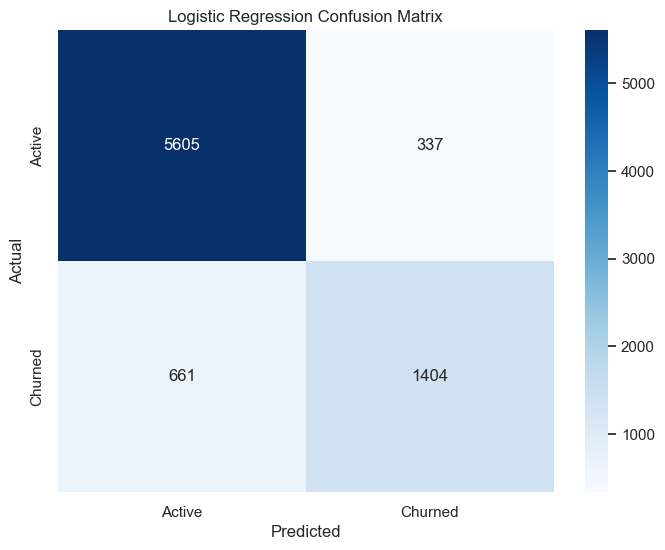

In [16]:
# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression Evaluation Metrics")
print("======================================")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Active', 'Churned'], 
            yticklabels=['Active', 'Churned'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
